# Indian Airlines Flight Market Analysis

Pada Analisa kali ini, dataset yang digunakan adalah Dataset Pemesanan Tiket Penerbangan dari berbagai Maskapai. Data ini diambil dari sebuah situs web ternama dalam format terstruktur berdasarkan tanggal. Dataset ini berisi catatan detail perjalanan penerbangan antar kota di India. Di dalamnya, terdapat berbagai fitur seperti Kota Asal & Tujuan, Waktu Kedatangan & Keberangkatan, Durasi, Tarif Penerbangan, Jumlah Transit, Kelas pada masing-masing maskapai serta Jarak Waktu Booking dengan Waktu Penerbangan Pesawat.

## Detail of Data


1) Airline: Nama Maskapai

2) Flight: Kode Penerbangan Maskapai

3) Source City: Kota Keberangkatan Pesawat

4) Departure Time: Waktu Keberangkatan Pesawat

5) Stops: Jumlah transit pada satu kali penerbangan

6) Arrival Time: Waktu Kedatangan Pesawat

7) Destination City: Kota Kedatangan Pesawat

8) Class: Kelas Pesawat

9) Duration: Total waktu penerbangan

10) Days Left: Jarak waktu booking dari waktu penerbangan

11) Price: Tarif Penerbangan untuk satu kali perjalanan penerbangan


Data yang akan diexplore adalah:

1. Jumlah Maskapai Penerbangan dan Frekuensinya

2. Bar Graph Waktu Keberangkatan dan Kedatangan Maskapai

3. Bar Graph Kota Asal dan Tujuan

4. Apakah Harga Bervariasi Berdasarkan Maskapai?

5. Maskapai mana yang menawarkan rata-rata harga paling murah untuk kelas economy?

6. Apakah waktu penerbangan dapat mempengaruhi harga tiket maskapai?

7. Rute penerbangan mana yang memiliki harga tiket tertinggi dan terendah?

8. Rute penerbangan mana yang memiliki harga termahal?

9. Apakah waktu penerbangan dapat mempengaruhi perubahan harga tiket?

10. Bagaimana Harga Berubah dengan Perubahan Kota Asal dan Tujuan?

In [ ]:
# Import Python Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# import data

df=pd.read_csv('airlines_flights_data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Memeriksa data teratas

df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# Memeriksa data terbawah

df.tail()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [ ]:
# Mengecek Sample dataset

df.sample(10)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
180121,180121,Vistara,UK-830,Hyderabad,Morning,one,Morning,Chennai,Economy,23.83,45,4009
108951,108951,SpiceJet,SG-209,Bangalore,Early_Morning,one,Evening,Kolkata,Economy,11.00,44,8536
293813,293813,Vistara,UK-826,Chennai,Afternoon,one,Night,Bangalore,Business,10.33,10,44144
266067,266067,Vistara,UK-720,Kolkata,Early_Morning,one,Evening,Mumbai,Business,9.33,31,68303
68830,68830,Vistara,UK-930,Mumbai,Early_Morning,one,Evening,Kolkata,Economy,12.08,41,6634
12859,12859,Indigo,6E-2247,Delhi,Morning,one,Evening,Bangalore,Economy,8.58,16,6008
266325,266325,Air_India,AI-402,Kolkata,Morning,one,Night,Mumbai,Business,10.83,35,50271
113301,113301,Indigo,6E-855,Bangalore,Night,zero,Night,Hyderabad,Economy,1.25,32,2343
116552,116552,Air_India,AI-640,Bangalore,Early_Morning,two_or_more,Evening,Chennai,Economy,9.50,14,12949
112414,112414,AirAsia,I5-818,Bangalore,Early_Morning,one,Evening,Hyderabad,Economy,13.83,25,3832


In [ ]:
# Memeriksa jenis data pada setiap kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
# Mengecek distribusi data

df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


## Data Cleaning

Duplicates Handling

In [ ]:
# Menghitung banyaknya data

len(df)

300153

In [ ]:
# Handle Duplikat

len(df.drop_duplicates())

300153

In [ ]:
# Mengecek data duplikat dibagi dengan jumlah data

len(df.drop_duplicates()) / len(df)

1.0

There are NO Duplicates Data

Missing Value Handling

In [ ]:
# Menghitung data yang null pada setiap kolom

df.isna().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


There are NO Missing Value

Outlier Handling

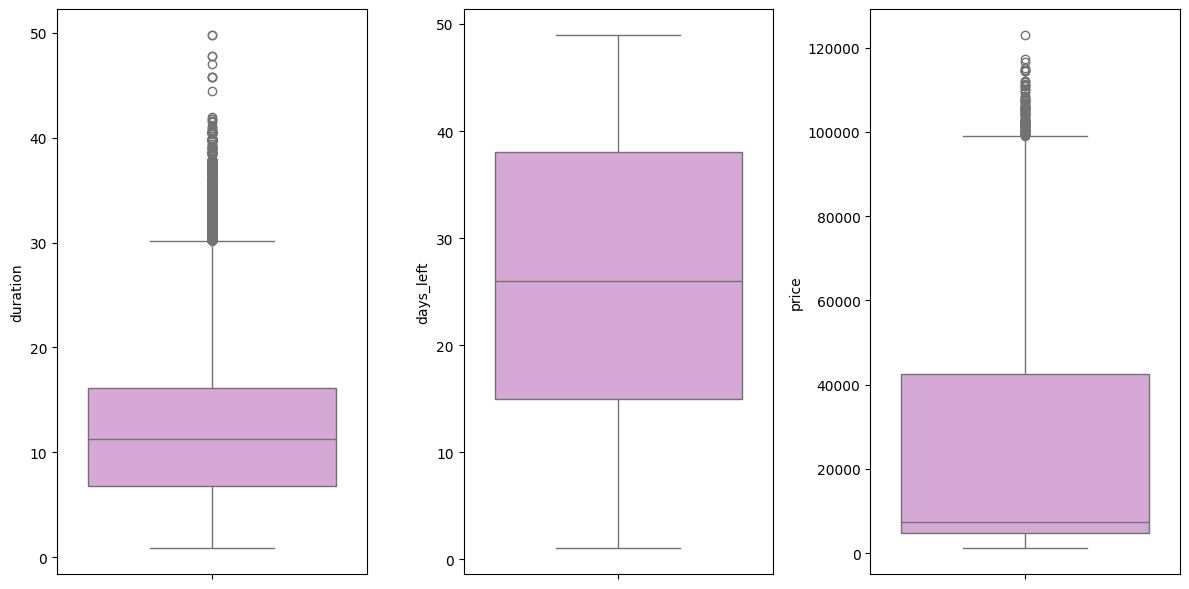

In [ ]:
# Menampilkan grafik yang mudah dibaca
plt.figure(figsize=(12,6))

# plotting
features = ['duration', 'days_left', 'price']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='plum')
    plt.tight_layout()

Boxplot are normal, there are no outliers

# EDA

## 1. Jumlah Maskapai Penerbangan dan Frekuensinya

In [ ]:
# Mengecek banyaknya maskapai

df['airline'].nunique()

6

In [ ]:
# Menampilkan nama-nama maskapai

df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [ ]:
# Menampilkan maskapai beserta frekuensi yang digunakan oleh penumpang

df['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


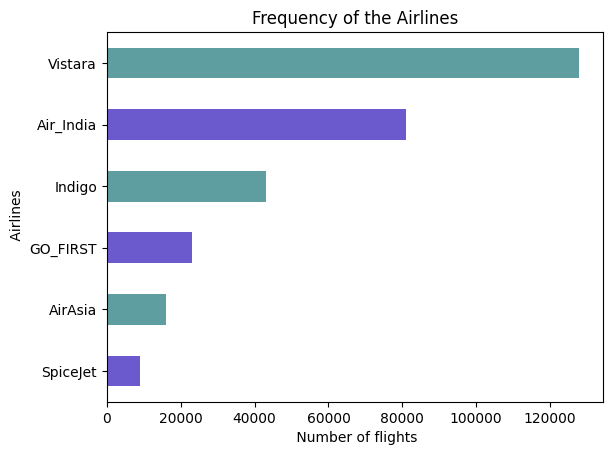

In [ ]:
# Menampilkan diagram hasil perhitungan frekuensi maskapai yang digunakan oleh penumpang

df['airline'].value_counts(ascending=True).plot.barh( color = ['slateblue', 'cadetblue'])

plt.title("Frequency of the Airlines")

plt.xlabel(" Number of flights")

plt.ylabel(" Airlines")

plt.show()

Berdasarkan Grafik di atas:

- Vistara memiliki jumlah penerbangan terbanyak dalam dataset (lebih dari 120.000).

- Air India dan Indigo menyusul sebagai maskapai dengan frekuensi terbanyak berikutnya.

- SpiceJet memiliki frekuensi terendah di antara semua maskapai yang terdaftar.

Hal ini menunjukkan bahwa dataset didominasi oleh beberapa maskapai penerbangan utama.

## 2. Bar Graph Waktu Keberangkatan dan Kedatangan Maskapai

In [ ]:
# Menampilkan hasil perhitungan jumlah waktu keberangkatan

df['departure_time'].value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [ ]:
# Menampilkan hasil perhitungan jumlah waktu kedatangan

df['arrival_time'].value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


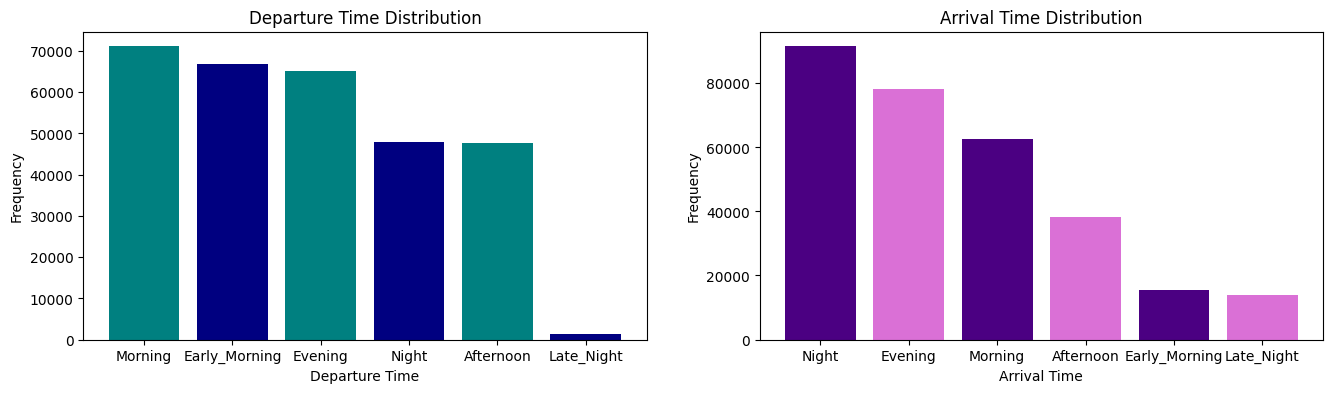

In [ ]:
# Menampilkan diagram hasil perhitungan jumlah waktu keberangkatan dan kedatangan

plt.figure(figsize = (16,4))

plt.subplot(1,2,1)

plt.bar( df['departure_time'].value_counts().index , df['departure_time'].value_counts().values, color = ['teal', 'navy'] )
plt.title("Departure Time Distribution")
plt.xlabel("Departure Time")
plt.ylabel("Frequency")


plt.subplot(1,2,2)

plt.bar( df['arrival_time'].value_counts().index, df['arrival_time'].value_counts().values, color = ['indigo', 'orchid'])
plt.title("Arrival Time Distribution")
plt.xlabel("Arrival Time")
plt.ylabel("Frequency")

plt.show()

Berdasarkan grafik di atas:

- Waktu Keberangkatan:

Sebagian besar penerbangan berangkat pada waktu Pagi (lebih dari 71.000), diikuti oleh Dini Hari (lebih dari 66.000) dan Sore (lebih dari 65.000).

Sangat sedikit penerbangan yang berangkat pada waktu Larut Malam (1.300).

- Waktu Kedatangan:

Sebagian besar penerbangan tiba pada waktu Malam (lebih dari 91.000) dan Sore (lebih dari 78.000).

Jumlah kedatangan terendah terjadi pada waktu Larut Malam (14.000) dan Dini Hari (15.000).

## 3. Bar Graph Kota Asal dan Tujuan

In [ ]:
# Menampilkan kota keberangkatan penerbangan

df['source_city'].value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


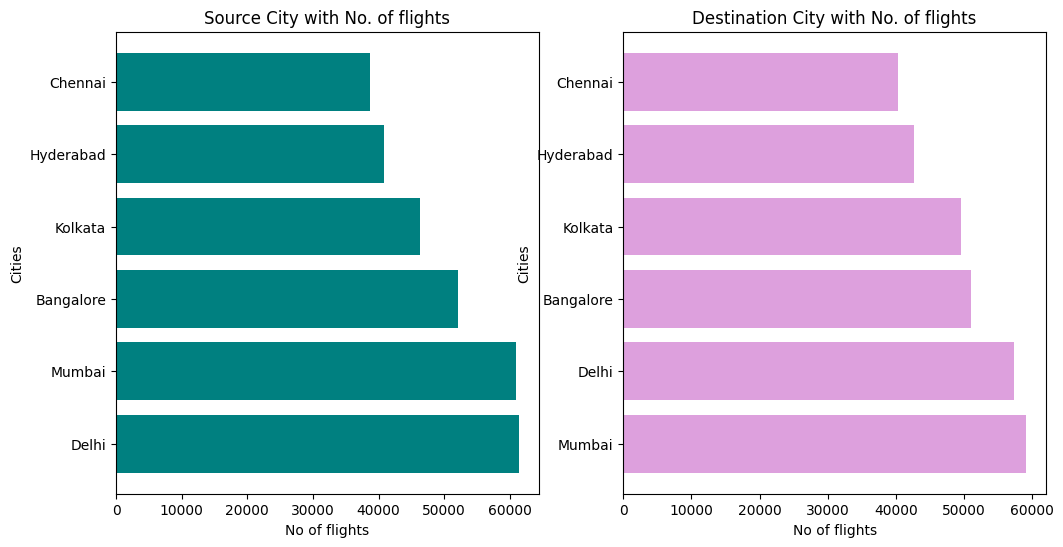

In [ ]:
# Menampilkan grafik hasil perhitungan kota keberangkatan dan kota tujuan penerbangan


plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.barh(df['source_city'].value_counts().index, df['source_city'].value_counts().values, color='teal')
plt.title('Source City with No. of flights')
plt.ylabel('Cities')
plt.xlabel('No of flights')

plt.subplot(1,2,2)
plt.barh(df['destination_city'].value_counts().index, df['destination_city'].value_counts().values, color='plum')
plt.title('Destination City with No. of flights')
plt.ylabel('Cities')
plt.xlabel('No of flights')

plt.show()

Berdasarkan hasil pemeriksaan di atas:

- Kota Asal:

Delhi dan Mumbai adalah kota keberangkatan yang paling umum.

Bengaluru dan Kolkata juga memberikan kontribusi yang signifikan terhadap jumlah keberangkatan.

Chennai memiliki jumlah penerbangan paling sedikit dalam dataset ini.


- Kota Tujuan:

Mumbai adalah tujuan yang paling sering, diikuti oleh Delhi.

## 4. Apakah Tarif Penerbangan Bervariasi Berdasarkan Maskapai?

In [ ]:
# Grouping maskapai berdasarkan masing masing harga tiket

df.groupby('airline')['price'].mean()

,price
airline,
AirAsia,4091.072742
Air_India,23507.019112
GO_FIRST,5652.007595
Indigo,5324.216303
SpiceJet,6179.278881
Vistara,30396.536302


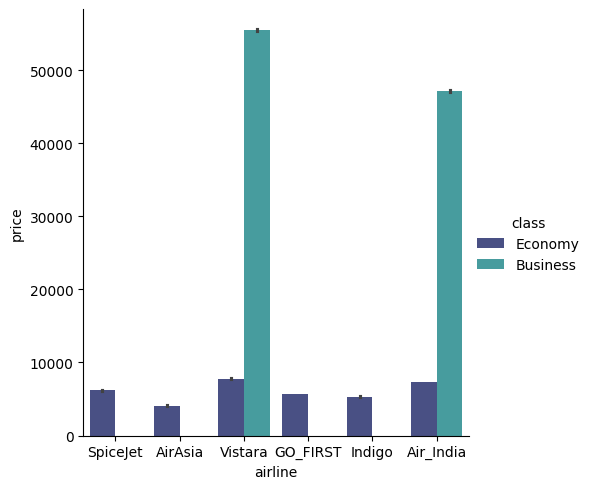

In [ ]:
# Grafik Tarif Penerbangan berdasarkan class maskapai

sns.catplot( x = 'airline', y = 'price', kind = 'bar', palette = 'mako', data = df, hue = 'class')

plt.show()

Tarif Penerbangan secara signifikan bervariasi berdasarkan maskapai dan kelas:

- Tarif Penerbangan kelas Bisnis untuk maskapai Vistara dan Air India adalah yang paling mahal, dengan tarif rata-rata sekitar $55.000.

- Tarif Penerbangan tiket kelas Ekonomi jauh lebih murah, di mana AirAsia menawarkan tarif yang paling terjangkau.

- Maskapai berbiaya rendah seperti GO_FIRST, Indigo, dan SpiceJet memiliki tarif penerbangan yang konsisten dan lebih rendah.


## 5. Maskapai mana yang menawarkan rata-rata tarif penerbangan paling murah untuk kelas economy?


/tmp/ipython-input-133504145.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=economy_avg.values, y=economy_avg.index, palette="rocket")


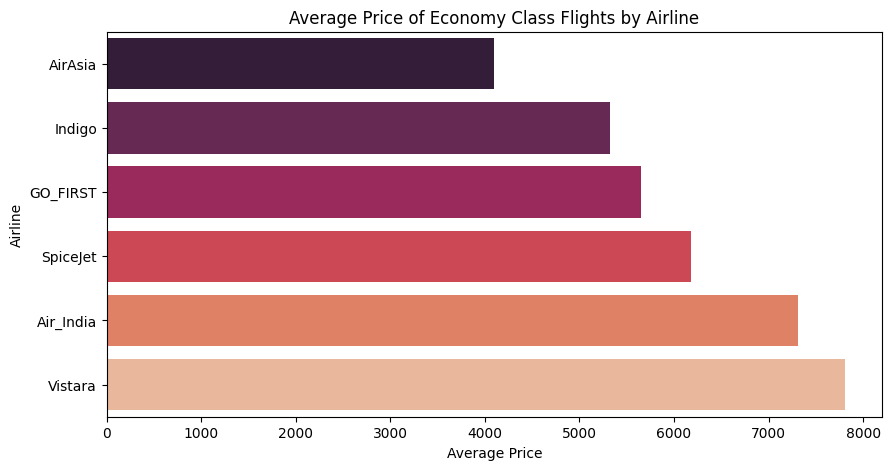

,price
airline,
AirAsia,4091.072742
Indigo,5324.216303
GO_FIRST,5652.007595
SpiceJet,6179.278881
Air_India,7313.682169
Vistara,7806.943645


In [ ]:
# Menghitung rata-rata tarif penerbangan di kelas economy
economy_avg = df[df['class'] == 'Economy'].groupby('airline')['price'].mean().sort_values()

plt.figure(figsize=(10,5))
sns.barplot(x=economy_avg.values, y=economy_avg.index, palette="rocket")
plt.title("Average Price of Economy Class Flights by Airline")
plt.xlabel("Average Price")
plt.ylabel("Airline")
plt.show()

economy_avg

Berdasrkan perhitungan rata-rata tarif penerbangan masing-masing maskapai di kelas economy:

- AirAsia menawarkan tarif rata-rata terendah untuk penerbangan kelas Ekonomi, menjadikannya pilihan yang paling ramah di kantong.

- Indigo dan GO_FIRST sedikit lebih tinggi, tetapi masih dalam kisaran harga yang terjangkau.

- SpiceJet dan Air India menunjukkan harga kelas menengah.

- Vistara memiliki tarif rata-rata tertinggi di antara semua maskapai untuk kelas Ekonomi.

## 6. Apakah waktu penerbangan dapat mempengaruhi tarif penerbangan maskapai?

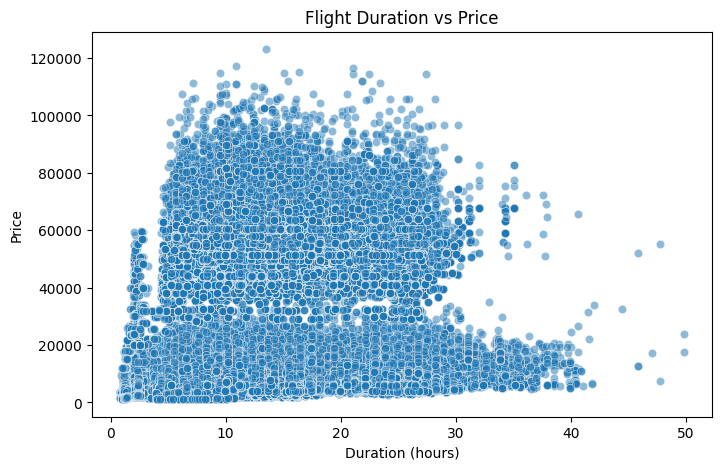

In [ ]:
# Plot hubungan antara waktu keberangkatan dengan tarif penerbangan
plt.figure(figsize=(8,5))
sns.scatterplot(x='duration', y='price', data=df, alpha=0.5)
plt.title("Flight Duration vs Price")
plt.xlabel("Duration (hours)")
plt.ylabel("Price")
plt.show()

Conclusion:

- Penerbangan yang lebih panjang umumnya cenderung lebih mahal, tetapi terdapat variasi tarif penerbangan yang signifikan untuk penerbangan dengan durasi yang sama.
- Durasi penerbangan memang menjadi faktor penentu tarif penerbangan, tetapi variabel lain seperti maskapai dan waktu pemesanan sangat memengaruhi biaya akhir.

## 7. Rute penerbangan mana yang memiliki tarif penerbangan tertinggi dan terendah?


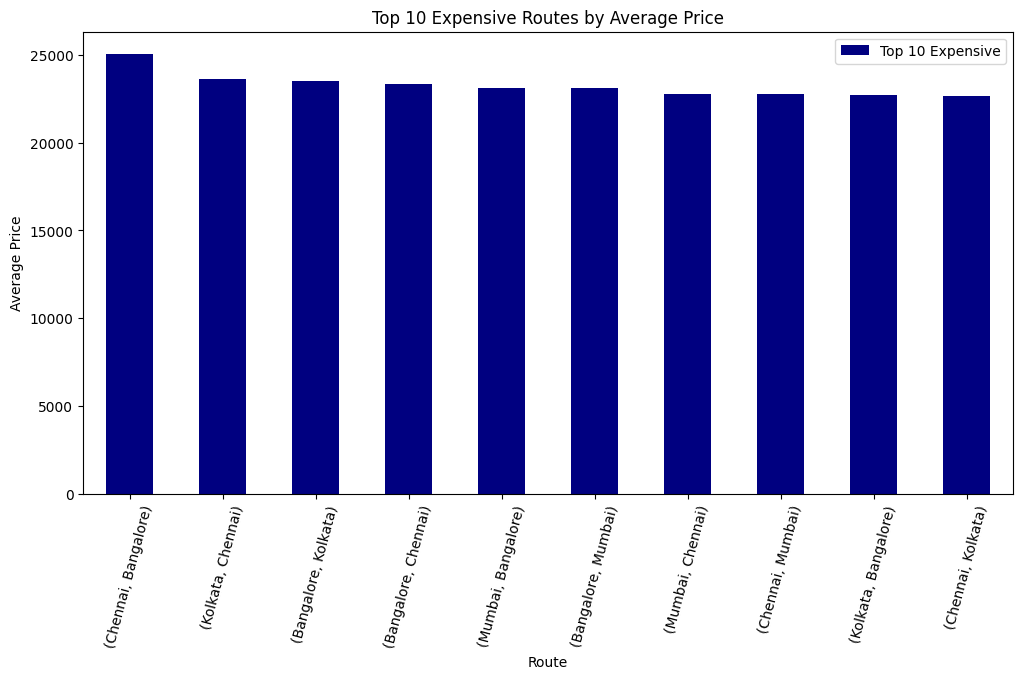

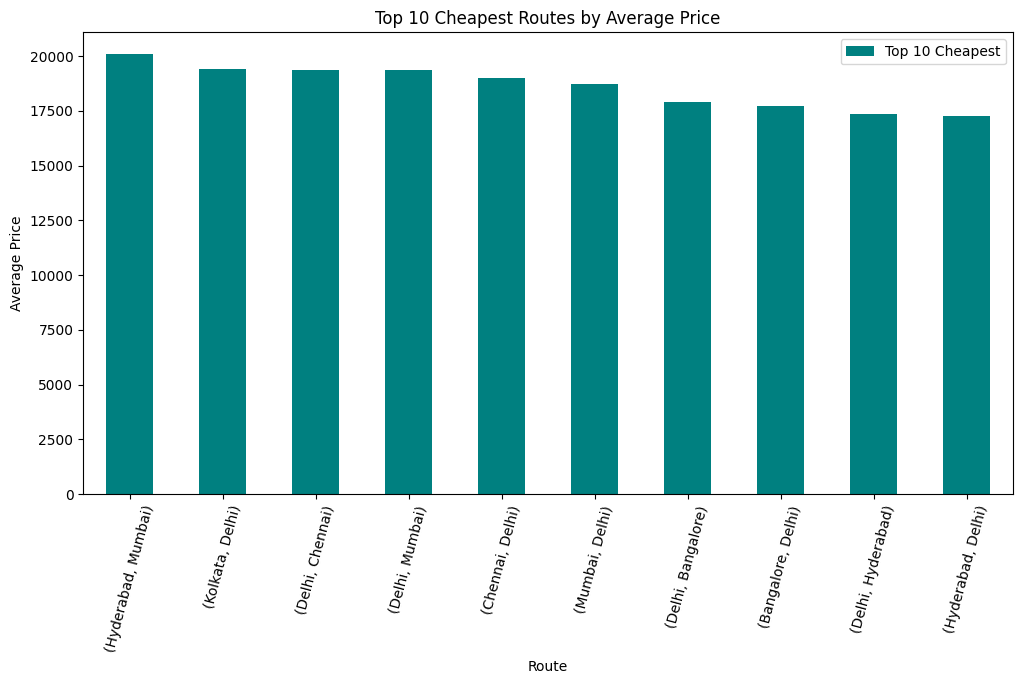

In [ ]:
# Menghitung rata-rata tarif penerbangan pada setiap rute penerbangan
route_price = df.groupby(['source_city', 'destination_city'])['price'].mean().sort_values(ascending=False)

# Plot top 10 tarif penerbangan yang paling mahal and top 10 harga tiket yang paling murah
plt.figure(figsize=(12,6))
route_price[:10].plot(kind='bar', color='navy', label='Top 10 Expensive')
plt.title("Top 10 Expensive Routes by Average Price")
plt.xlabel("Route")
plt.ylabel("Average Price")
plt.xticks(rotation=75)
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
route_price[-10:].plot(kind='bar', color='teal', label='Top 10 Cheapest')
plt.title("Top 10 Cheapest Routes by Average Price")
plt.xlabel("Route")
plt.ylabel("Average Price")
plt.xticks(rotation=75)
plt.legend()
plt.show()

- Top 10 Rute Termahal:

-- Rute termahal adalah Chennai ke Bangalore.

-- Rute-rute termahal utamanya berada di antara pusat-pusat bisnis utama, yang menunjukkan tingginya permintaan untuk pasangan kota ini.

- Top 10 Rute Termurah:

-- Rute termurah adalah Hyderabad ke Mumbai.

-- Rute-rute yang lebih murah juga menghubungkan kota-kota besar, tetapi dengan tarif penerbangan rata-rata yang jauh lebih rendah.

## 8. Rute penerbangan mana yang memiliki tarif penerbangan termahal?

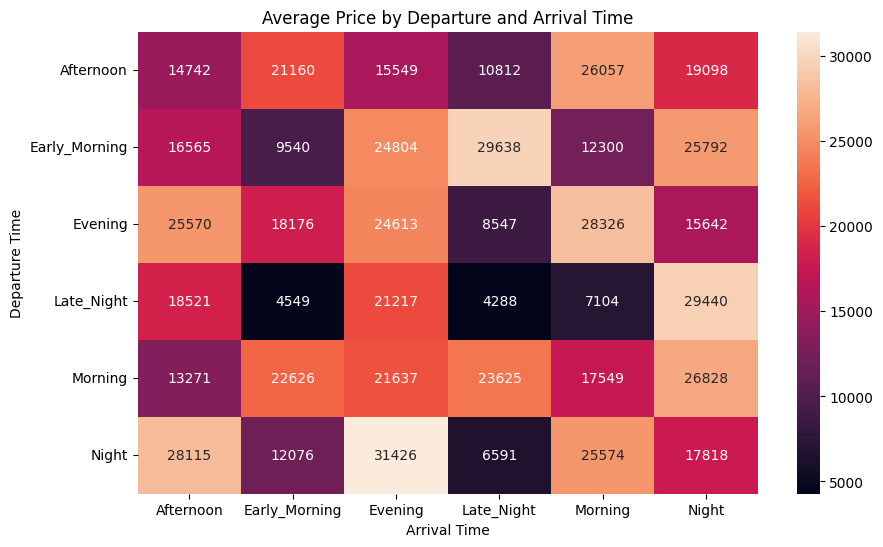

In [ ]:
# Group berdasarkan departure and arrival time
time_price = df.groupby(['departure_time', 'arrival_time'])['price'].mean().unstack()

plt.figure(figsize=(10,6))
sns.heatmap(time_price, annot=True, fmt=".0f", cmap="rocket")
plt.title("Average Price by Departure and Arrival Time")
plt.xlabel("Arrival Time")
plt.ylabel("Departure Time")
plt.show()

- Tarif Penerbangan Tertinggi: Tarif termahal adalah untuk penerbangan yang berangkat pada malam hari dan tiba pada sore hari ($31.426) dan penerbangan yang berangkat pada sore hari dan tiba pada pagi hari ($28.326).


- Tarif Penerbangan Terendah: Tarif termurah adalah untuk penerbangan yang berangkat Larut Malam dan juga tiba Larut Malam (4.288), yang menunjukkan bahwa waktu perjalanan yang tidak nyaman sering kali memiliki biaya yang lebih rendah.


- Insights: Penerbangan dengan waktu keberangkatan dan kedatangan yang nyaman untuk para pelancong bisnis (misalnya, penerbangan semalam atau penerbangan yang memungkinkan mereka bekerja seharian penuh) umumnya adalah yang paling mahal.









In [ ]:
# Memeriksa perubahan harga tiket berdasarkan waktu keberangkatan berdasarkan rata-rata harga tiket

df.groupby('departure_time')['price'].mean()

,price
departure_time,
Afternoon,18179.203331
Early_Morning,20370.676718
Evening,21232.361894
Late_Night,9295.299387
Morning,21630.760254
Night,23062.146808


## 9. Benarkah waktu penerbangan dapat mempengaruhi perubahan Tarif Penerbangan?

/tmp/ipython-input-2384311903.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='departure_time', y='price', estimator='mean', ci=None, palette='Blues')
/tmp/ipython-input-2384311903.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='departure_time', y='price', estimator='mean', ci=None, palette='Blues')
/tmp/ipython-input-2384311903.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='arrival_time', y='price', estimator='mean', ci=None, palette='Greens')
/tmp/ipython-input-2384311903.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.bar

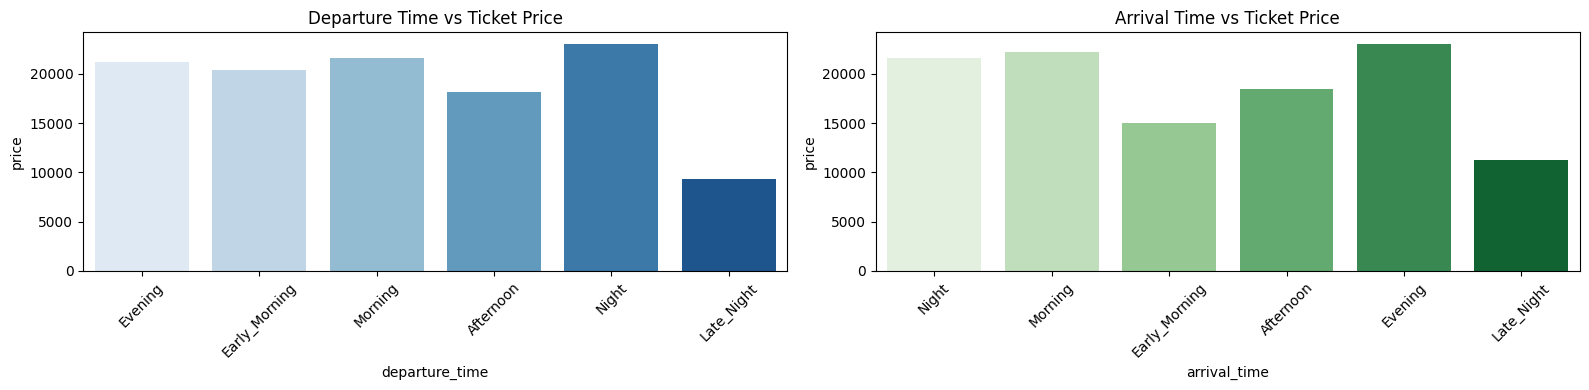

In [ ]:
# Menghitung tarif penerbangan sesuai dengan waktu keberangkatan pesawat dan waktu kedatangan pesawat

plt.figure(figsize=(16, 4))

# Subplot 1: Waktu Keberangkatan vs. Tarif Penerbangan
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='departure_time', y='price', estimator='mean', ci=None, palette='Blues')
plt.title('Departure Time vs Ticket Price')
plt.xticks(rotation=45)

# Subplot 2: Waktu Kedatangan vs. Tarif Penerbangan
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='arrival_time', y='price', estimator='mean', ci=None, palette='Greens')
plt.title('Arrival Time vs Ticket Price')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Benar, Tarif Penerbangan memang berubah berdasarkan waktu keberangkatan dan kedatangan.

- Waktu Keberangkatan:

Penerbangan yang berangkat pada Malam hari memiliki rata-rata tarif tertinggi.

Penerbangan yang berangkat pada Larut Malam memiliki rata-rata tarif terendah.

Keberangkatan pada sore hari dan pagi hari juga memiliki tarif penerbangan yang relatif lebih tinggi dibandingkan dengan keberangkatan pada siang hari.

- Waktu Kedatangan:

Penerbangan yang tiba pada Sore hari cenderung memiliki tarif tertinggi.

Penerbangan yang tiba pada Larut Malam atau Dini Hari memiliki tarif lebih rendah.

Tarif Penerbangan kedatangan pada pagi dan siang hari berada di kisaran sedang.

## 10. Bagaimana Tarif Penerbangan Berubah dengan Perubahan Kota Asal dan Tujuan?

In [ ]:
# Mengecek harga tiket berdasarkan kota keberangkatan dengan masing masing rata-rata harga tiket
df.groupby('source_city')['price'].mean().sort_values(ascending=False)

,price
source_city,
Chennai,21995.339871
Kolkata,21746.235679
Mumbai,21483.818839
Bangalore,21469.460575
Hyderabad,20155.623879
Delhi,18951.326639


In [ ]:
# Mengecek harga tiket berdasarkan kota kedatangan dengan masing masing rata-rata harga tiket

df.groupby('destination_city')['price'].mean().sort_values(ascending=False)

,price
destination_city,
Kolkata,21959.557556
Chennai,21953.323969
Bangalore,21593.955784
Mumbai,21372.529469
Hyderabad,20427.661284
Delhi,18436.767870


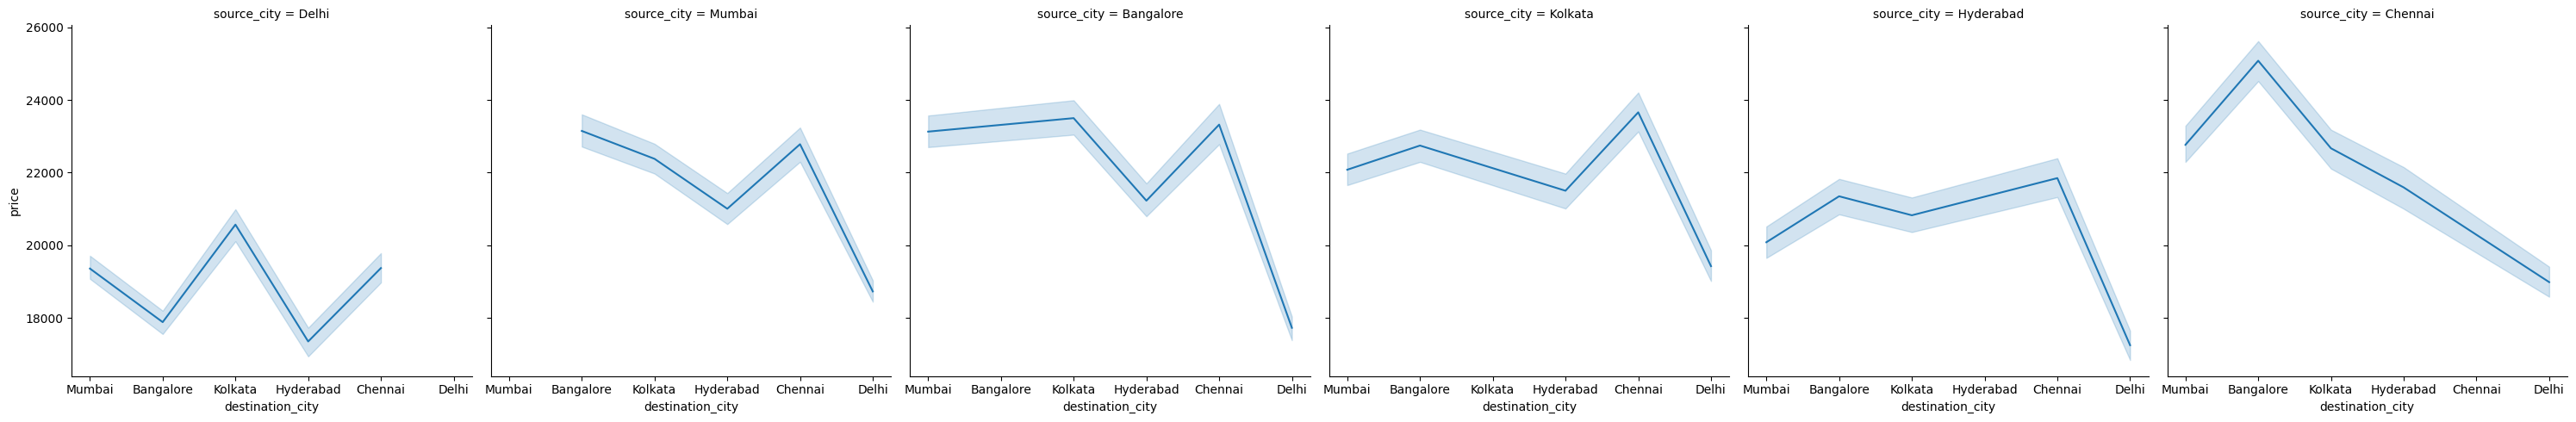

In [ ]:
# Mengecek distribusi perubahan harga tiket berdasarkan masing-masing kota kedatangan dan kota tujuan

sns.relplot( x = 'destination_city', y = 'price', data = df, col = "source_city", kind = 'line')

plt.show()

Conclusion:

- Variasi tarif terlihat jelas di setiap pasangan kota asal dan tujuan.

- Dari Delhi: Penerbangan ke Kolkata tarifnya lebih tinggi daripada penerbangan ke kota lain. Penerbangan ke Hyderabad lebih murah di antara rute-rute dari Delhi.

- Dari Mumbai: Penerbangan ke Chennai adalah yang paling mahal, sementara penerbangan ke Delhi lebih murah.

- Dari Bangalore: Penerbangan ke Kolkata mahal dibandingkan dengan rute ke Hyderabad dan Delhi.

- Dari Kolkata: Rute ke Chennai menunjukkan tarif tertinggi.

- Dari Hyderabad: Tarif tetap moderat di sebagian besar rute.

- Dari Chennai: Penerbangan ke Bangalore adalah yang paling mahal, sementara penerbangan ke Delhi lebih murah.

Insights :
Secara keseluruhan, rute-rute yang menempuh jarak lebih jauh atau memiliki layanan maskapai yang kurang sering (misalnya, Chennai–Bangalore, Kolkata–Chennai) memiliki harga tiket rata-rata yang jauh lebih tinggi.

## 7. Bagaimana Tarif Penerbangan Terpengaruh Jika Tiket Dibeli 1 atau 2 Hari Sebelum Keberangkatan?


In [ ]:
df['days_left'].nunique()

49

In [ ]:
df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
# Checking the Mean Ticket Price for different days_left

df.groupby('days_left')['price'].mean()

,price
days_left,
1,21591.867151
2,30211.299801
3,28976.083569
4,25730.905653
5,26679.773368
6,24856.493902
7,25588.367351
8,24895.883995
9,25726.246072


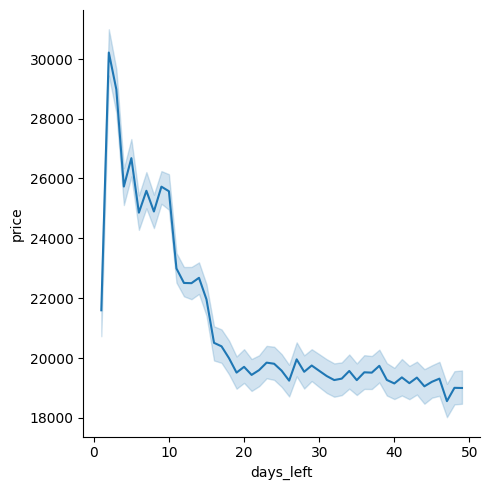

In [ ]:
sns.relplot( y='price', x = 'days_left', kind = 'line', data = df )

plt.show()

- Tarif Penerbangan tertinggi saat dipesan sangat dekat dengan tanggal keberangkatan (1-2 hari tersisa), dengan rata-rata sekitar $30.000+.

- Tarif Penerbangan mulai turun secara stabil setelah 10 hari tersisa, stabil di sekitar $18.000-$20.000 saat dipesan 20+ hari sebelumnya.

- Tren penurunan yang jelas menunjukkan bahwa pemesanan di menit-menit terakhir secara signifikan lebih mahal, sedangkan pemesanan lebih awal menghasilkan tarif yang jauh lebih murah.

## 8. Bagaimana Variasi Tarif Penerbangan Antara Kelas Ekonomi dan Bisnis?

In [ ]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [ ]:
# Filtering Data Penerbangan Kelas Economy

x = df [ df['class'] == 'Economy' ]
x

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
206661,206661,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697
206662,206662,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709
206663,206663,Vistara,UK-826,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640
206664,206664,Vistara,UK-822,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640


In [ ]:
# Menghitung rata-rata tarif penerbangan di kelas Economy

x.price.mean()

np.float64(6572.342383362527)

In [ ]:
# Filtering Data Penerbangan kelas Bisnis

y = df [ df['class'] == 'Business' ]
y

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206666,206666,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,1,25612
206667,206667,Air_India,AI-624,Delhi,Evening,zero,Night,Mumbai,Business,2.25,1,25612
206668,206668,Air_India,AI-531,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220
206669,206669,Air_India,AI-839,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450
206670,206670,Air_India,AI-544,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
# Menghitung rata-rata tarif penerbangan kelas Bisnis

y.price.mean()

np.float64(52540.08112357868)

In [ ]:
# Filtering dataset dengan berbagai kelas penerbangan

new_airlines_data = df [(df['airline'] == 'Vistara') & (df['source_city'] == 'Delhi') & (df['destination_city'] == 'Hyderabad')
     & (df['class'] == 'Business')]

In [ ]:
new_airlines_data

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
219123,219123,Vistara,UK-871,Delhi,Night,zero,Night,Hyderabad,Business,2.33,1,30630
219124,219124,Vistara,UK-879,Delhi,Evening,zero,Evening,Hyderabad,Business,2.25,1,38470
219129,219129,Vistara,UK-955,Delhi,Evening,one,Night,Hyderabad,Business,27.17,1,63513
219130,219130,Vistara,UK-955,Delhi,Evening,one,Afternoon,Hyderabad,Business,18.50,1,65764
219131,219131,Vistara,UK-985,Delhi,Evening,one,Night,Hyderabad,Business,25.08,1,69113
...,...,...,...,...,...,...,...,...,...,...,...,...
221863,221863,Vistara,UK-963,Delhi,Morning,one,Early_Morning,Hyderabad,Business,23.00,49,53937
221864,221864,Vistara,UK-985,Delhi,Evening,one,Early_Morning,Hyderabad,Business,12.00,49,59537
221865,221865,Vistara,UK-985,Delhi,Evening,one,Afternoon,Hyderabad,Business,16.42,49,59537
221866,221866,Vistara,UK-955,Delhi,Evening,one,Early_Morning,Hyderabad,Business,14.08,49,61889


In [ ]:
# Menghitung rata-rata tarif penerbangan

new_airlines_data['price'].mean()

np.float64(47939.840361445786)

Kesimpulan:

Kelas Ekonomi:

- Rata-Rata Tarif Penerbangan Ekonomi adalah sekitar $6.572.

- Tarif penerbangan kelas Ekonomi relatif stabil dengan sedikit variasi di setiap maskapai.

Kelas Bisnis:

- Rata-Rata Tarif Penerbangan Bisnis adalah sekitar $52.540.

- Tarif penerbangan kelas Bisnis kira-kira 8 kali lebih mahal dari kelas Ekonomi.

Insights:

Kesenjangan yang signifikan antara Tarif Penerbangan kelas Ekonomi dan Bisnis menunjukkan betapa pemilihan kelas sangat memengaruhi total biaya tiket.

## Kesimpulan dan Insight:

- Frekuensi dan Ketersediaan Maskapai:

  > Vistara dan Air India mengoperasikan jumlah penerbangan terbanyak.

  > SpiceJet memiliki frekuensi penerbangan terendah.

- Pola Waktu Keberangkatan dan Kedatangan:

  > Sebagian besar penerbangan berangkat pada Pagi hari dan tiba pada Malam hari.

  > Penerbangan Larut Malam lebih jarang dan biasanya lebih murah.

- Perbandingan Tarif Penerbangan pada setiap Maskapai:

  > Vistara dan Air India memiliki harga tiket rata-rata tertinggi.

  > AirAsia adalah maskapai yang paling ramah di kantong secara keseluruhan.

- Perbedaan Tarif Penerbangan Berdasarkan Kelas:

  > Tarif Penerbangan Rata-rata Kelas Ekonomi: ~$6.572

  > Tarif Penerbangan Rata-rata Kelas Bisnis: ~$52.540 (sekitar 8 kali lebih mahal dari Ekonomi).

- Tarif Penerbangan Berdasarkan Rute:

  > Rute Termahal: Chennai → Bangalore

  > Rute Termurah: Hyderabad → Mumbai

  > Rute antara pusat-pusat bisnis utama menunjukkan harga rata-rata yang lebih tinggi.

- Dampak Waktu Pemesanan:

  > Pemesanan di menit-menit terakhir (1–2 hari sebelum keberangkatan) harganya sekitar $30.000+.

  > Pemesanan lebih awal (20+ hari sebelumnya) menurunkan harga menjadi $18.000–$20.000.

- Pengaruh Waktu Keberangkatan dan Kedatangan terhadap Harga:

  > Penerbangan yang berangkat pada Malam hari dan tiba pada Sore hari adalah yang paling mahal (~$31.000+).

  > Penerbangan Larut Malam → Larut Malam adalah yang termurah (~$4.000).

- Insight:

  > Penerbangan dengan waktu yang nyaman untuk pelancong bisnis (misalnya, kedatangan malam) memiliki harga lebih tinggi.

  > Waktu di luar jam sibuk (keberangkatan larut malam) menawarkan penghematan biaya yang signifikan.

- Observasi Khusus Maskapai dan Kelas:

  > Kelas Bisnis Vistara adalah yang paling mahal, terutama untuk rute Delhi → Hyderabad (~$47.940).

  > AirAsia menawarkan tarif kelas Ekonomi terendah.

- Durasi Penerbangan vs Tarif Penerbangan:

  > Penerbangan yang lebih lama umumnya lebih mahal, tetapi tarif bervariasi berdasarkan maskapai, rute, dan waktu pemesanan.

- Penentuan Tarif Penerbangan Berdasarkan Permintaan:

  > Rute yang menghubungkan kota-kota besar dan pusat bisnis memiliki tarif yang lebih tinggi karena meningkatnya permintaan.

- Kenaikan Tarif Penerbangan di Menit-Menit Terakhir:

  > Vistara dan Air India menunjukkan kenaikan tarif yang signifikan untuk pemesanan di menit-menit terakhir.

  > AirAsia dan Indigo memiliki kenaikan tarif yang moderat.

## Rekomendasi Bisnis

> 1.) Pada dataset pemesanan tiket penerbangan ini dapat kita lihat perbandingan yang sangat signifikan pada penerbangan kelas Ekonomi dengan total 206666 pemesanan sedangkan pada penerbangan kelas Bisnis dengan total dengan hanya 93487 pemesanan. Dengan perbandingan ini, kita dapat menyimpulkan bahwa kemungkinan tarif penerbangan, waktu penerbangan dan kota asal & tujuan penerbangan di kelas Bisnis harus lebih bervariasi untuk menaikkan penjualan
penerbangan di kelas bisnis.


> 2.) Pada umumnya, waktu pemesanan memang memiliki perbedaan tarif namun jika kita melihat dari trend penjualan tiket penerbangan saat ini, kenaikan tarif sangat tidak efektif untuk mendapatkan penjualan yang maksimal. Mungkin kenaikan tarif penerbangan dapat dilakukan hanya pada saat Peak Season, misalnya saat long holiday. Namun pada kelas Bisnis seharusnya tidak memiliki kenaikan tarif karena dari data pemesanan di atas, penerbangan di kelas Bisnis masih kurang peminat.


> 3.) Dari data penerbangan Maskapai Airlines dapat disimpulkan bahwa maskapai tersebut memiliki tarif yang sangat terjangkau namun penjualan tiket tertinggi ada pada Vistara Air. Hal ini dapat dikatakan bahwa tarif penerbangan tidak mempengaruhi minat orang untuk membeli karena mungkin waktu penerbangan, kota asal dan tujuan penerbangan kurang bervariasi. Dengan kesimpulan tersebut dapat direkomendasikan kepada Maskapai AirAsia untuk lebih memperbaiki waktu penerbangan dan kota penerbangan yang telah berjalan saat ini.

> 4.) Dapat kita lihat di perhitungan rata-rata tarif penerbangan di Ekonomi (~$6.572), dan rata-rata tarif penerbangan kelas Bisnis (~$52.540), sekitar 8 kali lebih mahal dari Ekonomi. Bisa disimpulkan bahwa tarif penerbangan Bisnis sangat mahal, dan hal ini yang mungkin menyebabkan tingkat pemesanan penerbangan maskapai dengan kelas Bisnis cukup rendah dibandingkan kelas Ekonomi. Maka penentuan harga tarif penerbangan kelas Bisnis dapat dianalisa ulang sehingga tidak terlalu mahal.